In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# sales_data = pd.read_csv("./assets/data/sales-ps4.csv")
# covid_19_data = pd.read_csv("./assets/data/covid_19_data.csv")
PS4_data = pd.read_csv("./assets/data/PS4_3rd_party_sales.csv")
# ebay_data = pd.read_csv("./assets/data/ebay_data.csv")

## Chart of 3rd party ps4 sales by date

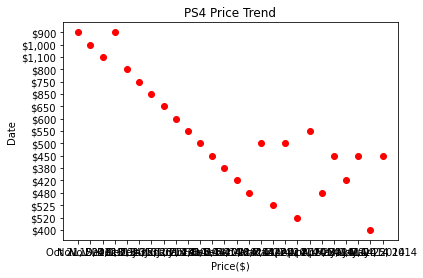

In [3]:
x = PS4_data["Date"].values
y = PS4_data["Price"].values

plt.scatter(x,y,color='red')
plt.xlabel('Price($)')
plt.ylabel('Date')
plt.title('PS4 Price Trend')
plt.gca().invert_yaxis()



plt.show()


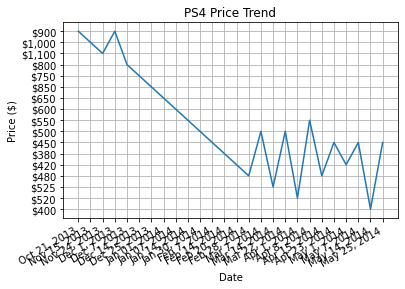

In [4]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('PS4 Price Trend')
ax.grid(True)
fig.autofmt_xdate()
plt.gca().invert_yaxis()

plt.show()

## Expierement with different graphs to tell a story with price movement

In [5]:
stock_data = pd.read_csv("./assets/data/Sony-stock-2010-2020.csv")
stock_data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 07, 2020","9,675.0","9,820.0","9,823.0","9,610.0",3.31M,-0.84%
1,"Dec 04, 2020","9,757.0","9,800.0","9,824.0","9,703.0",3.46M,-0.08%
2,"Dec 03, 2020","9,765.0","9,566.0","9,765.0","9,562.0",4.86M,1.53%
3,"Dec 02, 2020","9,618.0","9,786.0","9,799.0","9,587.0",8.03M,-1.86%
4,"Dec 01, 2020","9,800.0","9,804.0","9,925.0","9,756.0",5.66M,0.99%
...,...,...,...,...,...,...,...
2670,"Jan 08, 2010","2,809.0","2,785.0","2,809.0","2,769.0",6.98M,2.41%
2671,"Jan 07, 2010","2,743.0","2,750.0","2,764.0","2,723.0",2.90M,-0.04%
2672,"Jan 06, 2010","2,744.0","2,719.0","2,757.0","2,699.0",4.27M,0.92%
2673,"Jan 05, 2010","2,719.0","2,781.0","2,782.0","2,704.0",4.89M,-0.44%


In [ ]:
x = stock_data["Date"].values
y = stock_data["High"].values

fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('PS4 Price Trend')
ax.grid(True)
fig.autofmt_xdate()
plt.gca().invert_yaxis()

plt.show()
